In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [4]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam

In [5]:
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

### 讀入資料

In [6]:
name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(x_train, y_train0), (x_test, y_test0) = datasets.cifar10.load_data()

In [7]:
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [8]:
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

### 檢視測試資料

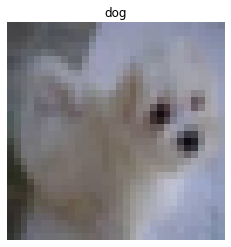

In [9]:
idx = np.random.randint(x_train.shape[0])
x_sample = x_train[idx]
y_sample = y_train0[idx].squeeze()

plt.imshow(x_sample)
plt.title(name_list[y_sample])
plt.axis('off');

### 建立分類cifar10的卷積神經網路

In [10]:
CNN_layers = [Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(128, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(512, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]

In [11]:
FC_layers = [Dense(units=256, activation='relu'),
             Dense(units=10, activation='softmax')]

In [12]:
CNN_layers + FC_layers

In [13]:
model = Sequential(CNN_layers+FC_layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 512)         590336    
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

In [14]:
model.compile(loss='categorical_crossentropy', 
                optimizer=Adam(),
                metrics=['categorical_accuracy'])

### 訓練

In [ ]:
model.fit(x_train, y_train, 
          batch_size=128, 
          epochs=5,
          validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 295s 6ms/sample - loss: 1.7860 - categorical_accuracy: 0.3238 - val_loss: 1.5820 - val_categorical_accuracy: 0.4214
Epoch 2/5
50000/50000 [==============================] - 260s 5ms/sample - loss: 1.4279 - categorical_accuracy: 0.4720 - val_loss: 1.3524 - val_categorical_accuracy: 0.4999
Epoch 3/5
50000/50000 [==============================] - 267s 5ms/sample - loss: 1.2536 - categorical_accuracy: 0.5437 - val_loss: 1.1645 - val_categorical_accuracy: 0.5800
Epoch 4/5
50000/50000 [==============================] - 269s 5ms/sample - loss: 1.1303 - categorical_accuracy: 0.5917 - val_loss: 1.0893 - val_categorical_accuracy: 0.6065
Epoch 5/5
 9856/50000 [====>.........................] - ETA: 3:06 - loss: 1.0836 - categorical_accuracy: 0.6092

### 預測

In [ ]:
score_train = model.evaluate(x_train, y_train)
score_test = model.evaluate(x_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

## 遷移學習

### 讀入資料集

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
(x_train2, y_train2), (x_test2, y_test2) = fashion_mnist.load_data()

In [ ]:
x_train2 = x_train2.reshape(60000, 28, 28, 1)/255
x_test2 = x_test2.reshape(10000, 28, 28, 1)/255

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train2 = to_categorical(y_train2, 10)
y_test2 = to_categorical(y_test2, 10)

### 開函數學習機

In [ ]:
from tensorflow.keras.models import Sequential 

from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras.optimizers import SGD

In [ ]:
CNN_layer2 = [Conv2D(16, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(32, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(64, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]

In [ ]:
FC_layer2 = [Dense(units=256, activation='relu'),
             Dense(units=10, activation='softmax')]

In [ ]:
model2 = Sequential(CNN_layer2+FC_layer2)
model2.summary()

In [ ]:
model2.compile(loss='categorical_crossentropy', 
               optimizer=Adam(), 
               metrics=['categorical_accuracy'])

### 訓練模型

In [ ]:
model2.fit(x_train2, y_train2,
           batch_size=256,
           epochs=10, 
           validation_data=(x_test2, y_test2))

### 查看預測

In [ ]:
score_train = model2.evaluate(x_train2, y_train2)
score_test = model2.evaluate(x_test2, y_test2)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')